## Part 1
### The follow are four sets of Equatorial coordinates.  
1) RA, Dec = 05h35m17.0s, -05d23m28.0s<br>
2) RA, Dec = 18h00m03.4s, +66d33m42.4s<br>
3) RA, Dec = 272.62917, -22.677778 degrees<br>
4) RA, Dec = 266.404996, -28.936178 degrees<br>

#### Use Python (and not Google!) to figure out which of the four correspond to the following locations:
1) Galactic Center<br>
2) A good place for a JWST ultra deep field<br>
3) A Solar System Object<br>

In [77]:
#Start by importing the astropy SkyCoord and units packages, as we did in the example
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.coordinates import ICRS, Galactic, FK4, FK5 
from astropy.coordinates import Angle, Latitude, Longitude
import numpy as np

In [21]:
#Uncomment next like to check out docstring (formatted comments) for the SkyCoord package
SkyCoord?

In [18]:
#Next, take the first coordinate.  
#Is there a transform you could do to figure out which of the three known locations it is?  
#Go back to the Solar System example to see how you did something similar then.
obj1 = SkyCoord('05h35m17.0s', '-05d23m28.0s', frame='fk5')
obj2 = SkyCoord('18h00m03.4s', '66d33m42.4s', frame='fk5')
obj3 = SkyCoord(272.62917*u.deg, -22.677778*u.deg, frame='icrs')
obj4 = SkyCoord(266.404996*u.deg, -28.936178*u.deg, frame='icrs')

In [19]:
#Once you have solved one object, move on to the others.  
#Remember, we have you four positions, but you're looking for three specific things, so one is a red herring.

print("obj1---", obj1.barycentrictrueecliptic, 
      "obj2---", obj2.galactic, 
      "obj3---", obj3.barycentrictrueecliptic, 
      "obj4---", obj4.galactic)

#galactic center should be (0,0) in galactic coord
#JWST deep field should be out of the galactic plane (any, +/- 90)
#solar system object... in the ecliptic plane??

obj1--- <SkyCoord (BarycentricTrueEcliptic: equinox=J2000.000): (lon, lat) in deg
    (82.98393616, -28.68001874)> obj2--- <SkyCoord (Galactic): (l, b) in deg
    (96.38520103, 29.80580469)> obj3--- <SkyCoord (BarycentricTrueEcliptic: equinox=J2000.000): (lon, lat) in deg
    (272.42598026, 0.739365)> obj4--- <SkyCoord (Galactic): (l, b) in deg
    (3.31389035e-06, -5.88592742e-06)>


In [3]:
#In this cell, list your answers:

#Galactic Center = Object 4
#JWST Ultra Deep Field = Object 2
#Solar System Object = Object 3

## Part 2
In class we saw where the Ecliplic plane lies in Galactic coordinates.  For this part of your assignment, we would like you to make a plot in Celestial coordinates (where the horizontal axis is Right Ascention from 0 to 24 hours, and the vertical axis is declination, from -90 to +90 degrees).  On this plot, draw curves for the postion of the Ecliptic Plane and Galactic plane, and label both the Ecliptic and Galactic poles.


In [167]:
#Use this cell to make this plot
#Note that SkyCoord can handle arrays of multiple coordinates
#We recommend matplotlib.pyplot for plotting

#gal_cen = SkyCoord(0, 0, frame='galactic', unit='deg')
gal_north = SkyCoord(0, 90, frame='galactic', unit='deg')
gal_south = SkyCoord(0, -90, frame='galactic', unit='deg')

#generates list of coordinates of galactic plane in galactic coords
gal_pnts_l = np.vstack(np.arange(0, 360, 30))
gal_pnts_b = np.vstack(np.zeros(12))
gal_pairs = np.hstack((gal_pnts_l, gal_pnts_b))
gal_pairs1 = SkyCoord(gal_pairs, frame='galactic', unit='deg')
#print(gal_pairs1)

#convert to icrs
icrs_gal = gal_pairs1.icrs
gal_nor = gal_north.icrs #(192.85947789, 27.12825241)
gal_so = gal_south.icrs #(12.85947789, -27.12825241)

data = np.array([(266.40498829, -28.93617776), (281.52164248,  -2.60914152),
     (295.97637495,  23.89037583), (318.00438151,  48.32963721),
     (  6.45083114,  62.72572675), ( 61.11706742,  52.42018612),
     ( 86.40498829,  28.93617776), (101.52164248,   2.60914152),
     (115.97637495, -23.89037583), (138.00438151, -48.32963721),
     (186.45083114, -62.72572675), (241.11706742, -52.42018612)])
#print(data)

#sorts pairs into ra and dec
ra, dec =[], []
for i in range(len(data)):
    ra.append(data[i][0])
    dec.append(data[i][1])

#coverts ra to hourangle
ra1 = u.deg.to(u.hourangle, ra)
gal_nor1 = u.deg.to(u.hourangle, (192.85947789, 27.12825241))
gal_so1 = u.deg.to(u.hourangle, (12.85947789, -27.12825241))
#gal_nor1, gal_so1 = (12.85729853  1.80855016), (0.85729853 -1.80855016) for plotting

#print(ra1, dec) 

In [179]:
#now same process for the ecliptic plane
ec_north = SkyCoord(0, 90, 1, frame='barycentrictrueecliptic', unit='deg')
ec_south =  SkyCoord(0, -90, 1, frame='barycentrictrueecliptic', unit='deg')

#creates list of ec plane in ec coords
ec_pnts_lat = np.vstack(np.arange(0, 360, 30))
ec_pnts_lon = np.vstack(np.zeros(12))
ec_pairs = np.hstack((ec_pnts_lat, ec_pnts_lon))
ec_pairs1 = SkyCoord(ec_pairs, frame='barycentrictrueecliptic', unit='deg')

#convert to icrs
icrs_ec = ec_pairs1.icrs
icrs_ec_nor = ec_north.icrs #(269.9999853, 66.56071866, 1.)
icrs_ec_so = ec_south.icrs #(89.9999853, -66.56071866, 1.)
#print(icrs_ec_nor, icrs_ec_so)

data1 = np.array([(359.99999592,  4.60454765e-06), ( 27.91054789,  1.14719731e+01),
     ( 57.81874009,  2.01503631e+01), ( 89.99999791,  2.34392813e+01),
     (122.18125461,  2.01503582e+01), (152.08944482,  1.14719650e+01),
     (179.99999592, -4.60454764e-06), (207.91054789, -1.14719731e+01),
     (237.81874009, -2.01503631e+01), (269.99999791, -2.34392813e+01),
     (302.18125461, -2.01503582e+01), (332.08944482, -1.14719650e+01)])

#sorts
raa, decc = [],[]
for i in range(len(data1)):
    raa.append(data1[i][0])
    decc.append(data1[i][1])
    
#convert to hourangle
ra2 = u.deg.to(u.hourangle, raa)
ec_north_plot = u.deg.to(u.hourangle, (269.9999853, 66.56071866))
ec_south_plot = u.deg.to(u.hourangle, (89.9999853, -66.56071866))
print(ec_north_plot, ec_south_plot) #[17.99999902  4.43738124] [ 5.99999902 -4.43738124]

[17.99999902  4.43738124] [ 5.99999902 -4.43738124]


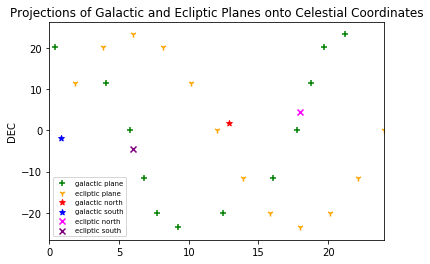

In [193]:
#plotting the points
plt.scatter(ra1, dec, color='green', label='galactic plane', marker='+') #plots gal plane
plt.scatter(ra2, decc, color='orange', label='ecliptic plane', marker='1') #plots ecliptic plane
plt.scatter(12.85729853,  1.80855016, color='red', label='galactic north', marker='*') #plots gal north
plt.scatter(0.85729853, -1.808550161, color='blue', label='galactic south', marker='*') # plots gal south
plt.scatter(17.99999902,  4.43738124, color='magenta', label='ecliptic north', marker='x') #plots ec north
plt.scatter( 5.99999902, -4.43738124, color='purple', label='ecliptic south', marker='x') #plots ec south
plt.legend(fontsize='x-small')
plt.xlim([0, 24])
#plt.ylim([-90, 90])
#plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('Projections of Galactic and Ecliptic Planes onto Celestial Coordinates')
plt.show()

## Part 3
Here are four sets of coordinates, with the coordinate system labeled.  We'd like to know which of these will be observable at midnight tonight from Austin.  List in the following cell what information you would need to know to answer this question.  If you are able to find that information, go ahead and attempt to answer it.  We will start with this on Tuesday.<br>
1) Ecliptic (l,b) = 88.55519406, +66.10205367 <br>
2) Ecliptic (l,b) = 276.38398872, -29.81144569 <br>
3) Galactic (l,b) = 148.18864288, -60.46831563 <br>
4) Galactic (l,b) = 151.41580923, -9.36984271 <br>

In [194]:
# need the object to be in the northern hemisphere winter sky
# needs to be up in late January 
# needs to be up at midnight

#local sidereal time of austin: 1hr58m55.5632s = ~29.7292deg
#if the object's RA is w/i 6hrs (90deg) E/W of the sidereal then it is observable

obj1 = SkyCoord(88.55519406, +66.10205367, frame='barycentrictrueecliptic', unit='deg')
obj2 = SkyCoord(276.38398872, -29.81144569, frame='barycentrictrueecliptic', unit='deg')
obj3 = SkyCoord(148.18864288, -60.46831563, frame='galactic', unit='deg')
obj4 = SkyCoord(151.41580923, -9.36984271, frame='galactic', unit='deg')

In [195]:
print(obj1.icrs, obj2.icrs, obj3.icrs, obj4.icrs)
#RA, DEC
#1: (37.67345822, 89.26058333)
#2: (279.23486724, -53.04626574)
#3: (25., 3.45455177e-09)
#4: (53.91026104, 44.23333522)

#obj w/ RA b/w -61, 119 deg are observable
#so, objects 1, 3, 4 are observable at midnight in Austin tonight

<SkyCoord (ICRS): (ra, dec) in deg
    (37.67345822, 89.26058333)> <SkyCoord (ICRS): (ra, dec) in deg
    (279.23486724, -53.04626574)> <SkyCoord (ICRS): (ra, dec) in deg
    (25., 3.45455177e-09)> <SkyCoord (ICRS): (ra, dec) in deg
    (53.91026104, 44.23333522)>
